# Enter Student Name & ID

In [1]:
student_id =   "99102189"
student_name = "Mohammad Mohammad Beigi"

print("your student id:", student_id)
print("your name:", student_name)

your student id: 99102189
your name: Mohammad Mohammad Beigi


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [2]:
import numpy as np

In [36]:
# Define the custom PCA function
def myPCA(X, num_components):
    # Step 1: Standardize the Data
    X_meaned = X - np.mean(X, axis=0)

    # Step 2: Compute the Covariance Matrix
    covariance_matrix = np.cov(X_meaned, rowvar=False)

    # Step 3: Compute the Eigenvalues and Eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort Eigenvalues and Eigenvectors
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]

    # Step 5: Select the top 'num_components' eigenvectors
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]

    # Step 6: Transform the Data
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()

    return X_reduced, eigenvector_subset

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [6]:
import matplotlib as plt
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

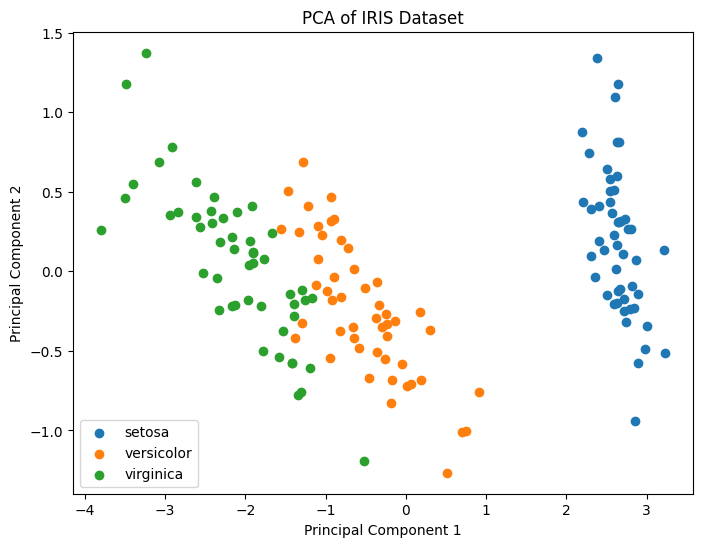

In [7]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA on the Iris dataset, reducing it to 2 components
X_reduced, eigenvector_subset = myPCA(X, 2)

# Plot the results
plt.figure(figsize=(8, 6))
for target in np.unique(y):
    plt.scatter(X_reduced[y == target, 0], X_reduced[y == target, 1], label=iris.target_names[target])

plt.title('PCA of IRIS Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.



`Answer 2.1: `
### Eigenfaces and Their Relationship to PCA

**Eigenfaces:**
Eigenfaces are a set of eigenvectors used in the computer vision problem of human face recognition. These eigenvectors are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of possible faces.

**How Eigenfaces are Related to PCA:**

1. **High-Dimensional Data Reduction:**
   - In face recognition, images of faces are typically high-dimensional data. Each pixel in an image represents a dimension, so a grayscale image of 100x100 pixels has 10,000 dimensions. PCA is used to reduce this high-dimensional data to a lower-dimensional form while retaining as much variance as possible.

2. **Principal Components:**
   - PCA identifies the principal components, which are directions in the data that capture the most variance. For face images, these principal components are the "eigenfaces." Each eigenface represents a pattern or feature of the faces in the dataset.

3. **Covariance Matrix and Eigenvectors:**
   - PCA involves computing the covariance matrix of the dataset and then finding its eigenvalues and eigenvectors. The eigenvectors (eigenfaces) corresponding to the largest eigenvalues capture the most significant variations in the face images.

4. **Projection of Faces:**
   - Each face image in the dataset can be projected onto the eigenfaces to obtain a set of weights. These weights are the coordinates of the face image in the lower-dimensional space defined by the eigenfaces. This projection reduces the dimensionality of the face image while preserving the essential features for recognition.

5. **Reconstruction:**
   - The original face images can be approximately reconstructed from the lower-dimensional representation by combining the eigenfaces weighted by the corresponding weights. The more eigenfaces used, the more accurate the reconstruction.


### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [21]:
!pip install opencv-python

import cv2
import os
import numpy as np

# Set the path to your dataset directory
dataset_path = '/content/drive/MyDrive/Colab Notebooks/FacesDataset1/ORL'

# Initialize lists to hold train and test data and labels
X_train = []
y_train = []
X_test = []
y_test = []

# Loop through each folder (each person)
for person_id in range(40):  # Assuming 40 folders for 40 individuals
    person_path = os.path.join(dataset_path, f's{person_id+1}')

    for img_id in range(10):  # Each folder contains 10 images
        img_path = os.path.join(person_path, f'{img_id+1}.bmp')

        # Read the image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Flatten the image into a 1D array
        img_flattened = img.flatten()

        if img_id < 5:
            # First 5 images for training
            X_train.append(img_flattened)
            y_train.append(person_id)
        else:
            # Last 5 images for testing
            X_test.append(img_flattened)
            y_test.append(person_id)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Print the shapes of the datasets to verify
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (200, 2304)
y_train shape: (200,)
X_test shape: (200, 2304)
y_test shape: (200,)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [38]:
num_components = 45


# Perform PCA on training data
X_train_pca, eigenvector_subset = myPCA(X_train, num_components)

# Apply the same transformation to the test data
X_meaned_test = X_test - np.mean(X_test, axis=0)
X_test_pca = np.dot(eigenvector_subset.transpose(), X_meaned_test.transpose()).transpose()


# Print the shapes of the PCA-transformed datasets to verify
print(f'X_train_pca shape: {X_train_pca.shape}')
print(f'X_test_pca shape: {X_test_pca.shape}')

X_train_pca shape: (200, 45)
X_test_pca shape: (200, 45)


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Train an LDA classifier on the PCA-transformed training data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)

# Predict on the test data
y_pred = lda.predict(X_test_pca)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 92.50%


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


PCA components: 40, Accuracy: 92.50%
PCA components: 45, Accuracy: 92.50%
PCA components: 50, Accuracy: 93.50%
PCA components: 55, Accuracy: 90.50%
PCA components: 60, Accuracy: 90.00%
PCA components: 65, Accuracy: 92.00%
PCA components: 70, Accuracy: 91.50%
PCA components: 75, Accuracy: 92.50%
PCA components: 80, Accuracy: 92.50%
PCA components: 85, Accuracy: 93.00%
PCA components: 90, Accuracy: 91.50%
PCA components: 95, Accuracy: 92.50%
PCA components: 100, Accuracy: 89.50%


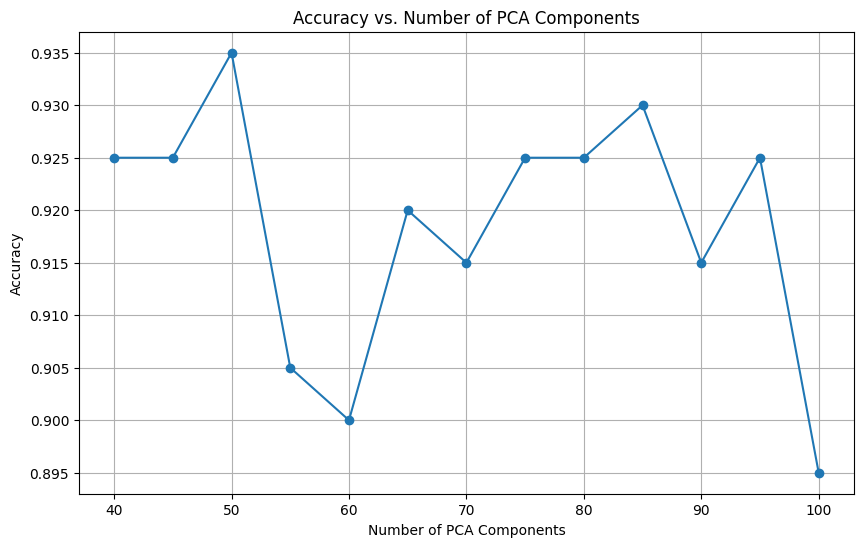

In [40]:
# Define a range of PCA dimensions to test
pca_dimensions = range(40, 101, 5)  # From 40 to 100 in steps of 5
accuracies = []

for num_components in pca_dimensions:
    # Perform PCA on training data
    X_train_pca, eigenvector_subset = myPCA(X_train, num_components)

    # Apply the same transformation to the test data
    X_meaned_test = X_test - np.mean(X_test, axis=0)
    X_test_pca = np.dot(eigenvector_subset.transpose(), X_meaned_test.transpose()).transpose()

    # Train an LDA classifier on the PCA-transformed training data
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train_pca, y_train)

    # Predict on the test data
    y_pred = lda.predict(X_test_pca)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Print the accuracy for the current number of components
    print(f'PCA components: {num_components}, Accuracy: {accuracy * 100:.2f}%')

# Plot the accuracies for different PCA dimensions
plt.figure(figsize=(10, 6))
plt.plot(pca_dimensions, accuracies, marker='o')
plt.title('Accuracy vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Based on the provided plot, we can analyze and discuss the results of varying the number of PCA components on the classification accuracy of the LDA model. Here are some key observations:

1. **Peak Performance**: The highest accuracy (~93.5%) is observed at around 45 components. This indicates that, for this particular dataset and model, using around 45 principal components provides the best discriminative features for the LDA classifier.

2. **Accuracy Fluctuations**: There is a noticeable fluctuation in accuracy as the number of components changes. This suggests that not all components contribute equally to the model's performance. Including too many components may introduce noise or redundant information, which can negatively impact the classifier's performance.

3. **Initial Stability**: Between 40 and 45 components, the accuracy remains relatively stable, around 92.5% to 93%. This indicates that the most critical features for classification are captured within the first 40 to 45 principal components.

4. **Decreasing Trend**: Beyond 50 components, there is a general decreasing trend in accuracy, with some local peaks. This suggests that additional components beyond a certain threshold do not necessarily add useful information for the classification task and may instead degrade performance.

5. **Final Drop**: At 100 components, there is a sharp drop in accuracy. This might be due to overfitting, where the model starts to capture noise in the data as significant features, leading to poorer generalization on the test set.

6. **Optimal Range**: Based on the plot, the optimal range for the number of principal components seems to be between 40 and 50 components. Within this range, the classifier achieves high accuracy without significant fluctuations.

### Conclusion
The results highlight the importance of selecting an appropriate number of principal components in PCA for dimensionality reduction. While reducing dimensionality can help improve model performance by removing noise and redundant features, adding too many components can have the opposite effect. Therefore, careful tuning and cross-validation are necessary to find the optimal number of components that balance information retention and noise reduction.


PCA components: 1, Accuracy: 8.50%
PCA components: 6, Accuracy: 64.50%
PCA components: 11, Accuracy: 83.50%
PCA components: 16, Accuracy: 90.50%
PCA components: 21, Accuracy: 92.00%
PCA components: 26, Accuracy: 91.50%
PCA components: 31, Accuracy: 94.00%
PCA components: 36, Accuracy: 92.00%
PCA components: 41, Accuracy: 92.00%
PCA components: 46, Accuracy: 91.50%
PCA components: 51, Accuracy: 93.00%
PCA components: 56, Accuracy: 90.50%
PCA components: 61, Accuracy: 91.00%
PCA components: 66, Accuracy: 92.00%
PCA components: 71, Accuracy: 92.00%
PCA components: 76, Accuracy: 91.50%
PCA components: 81, Accuracy: 92.50%
PCA components: 86, Accuracy: 93.50%
PCA components: 91, Accuracy: 92.50%
PCA components: 96, Accuracy: 90.50%


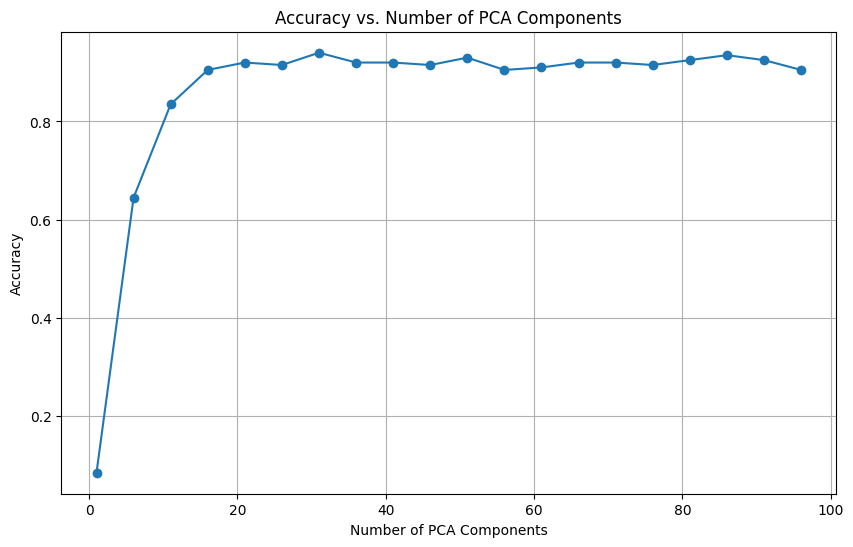

In [41]:
# Define a range of PCA dimensions to test
pca_dimensions = range(1, 101, 5)  # From 1 to 100 in steps of 5
accuracies = []

for num_components in pca_dimensions:
    # Perform PCA on training data
    X_train_pca, eigenvector_subset = myPCA(X_train, num_components)

    # Apply the same transformation to the test data
    X_meaned_test = X_test - np.mean(X_test, axis=0)
    X_test_pca = np.dot(eigenvector_subset.transpose(), X_meaned_test.transpose()).transpose()

    # Train an LDA classifier on the PCA-transformed training data
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train_pca, y_train)

    # Predict on the test data
    y_pred = lda.predict(X_test_pca)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Print the accuracy for the current number of components
    print(f'PCA components: {num_components}, Accuracy: {accuracy * 100:.2f}%')

# Plot the accuracies for different PCA dimensions
plt.figure(figsize=(10, 6))
plt.plot(pca_dimensions, accuracies, marker='o')
plt.title('Accuracy vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Based on the provided plot, which shows the accuracy of the LDA classifier as a function of the number of PCA components, we can make several observations to determine the sufficient number of features:

1. **Rapid Increase Initially**: There is a rapid increase in accuracy from 0 to about 20 components. This suggests that the most significant features for classification are captured within these first 20 components.

2. **Plateauing**: From around 20 components onwards, the accuracy begins to plateau, reaching a peak and then maintaining a relatively high and stable accuracy with minor fluctuations. This indicates that additional components beyond this point are contributing less significant information.

3. **Peak Performance**: The accuracy stabilizes at around 90% after 20 components, with minor increases and decreases, indicating that the model has captured the essential features needed for accurate classification by this point.
